## Linear Regression from Scratch

[https://youtu.be/ltXSoduiVwY?si=HTx7HEjB4c88mY-C](https://youtu.be/ltXSoduiVwY?si=HTx7HEjB4c88mY-C)

In [1]:
import numpy as np

In [3]:
class LinearRegression:

    def __init__(self, learning_rate=0.001, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0


        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

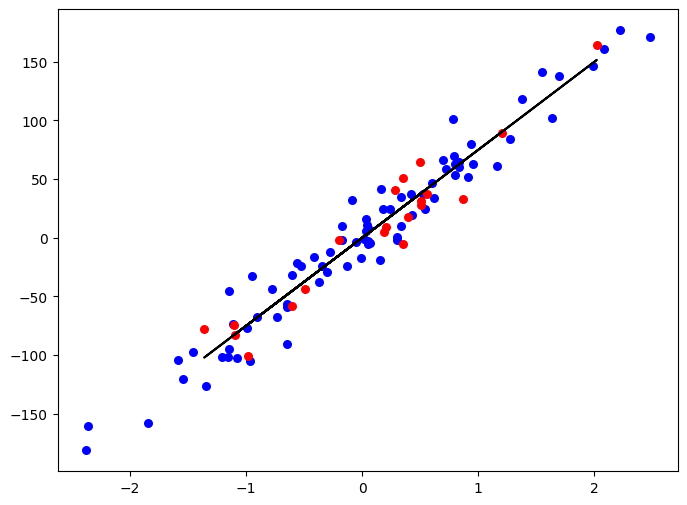

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X , y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

regressor = LinearRegression(learning_rate=0.01, n_iterations=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color="b", s=30)
plt.scatter(X_test, y_test, color="r", s=30)
plt.plot(X_test, predictions, color="k")
plt.show()



In [6]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse_value = mse(y_test, predictions)
print("MSE:", mse_value)

MSE: 305.7719958301902


In [8]:
def r2_score(y_true, y_pred):
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (numerator / denominator)

r2_value = r2_score(y_test, predictions)
print("R2:", r2_value)

R2: 0.9247520464311005


In [10]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

rmse_value = rmse(y_test, predictions)
print("RMSE:", rmse_value)

RMSE: 17.486337404676547


In [11]:
def adjusted_r2(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))  

adjusted_r2_value = adjusted_r2(y_test, predictions, X_test.shape[0], X_test.shape[1])
print("Adjusted R2:", adjusted_r2_value)

Adjusted R2: 0.9205716045661617


In [4]:
def simple_linear_regression(x, y):
    # Number of observations/points
    n = len(x)
    
    # Mean of x and y vector
    mean_x = sum(x) / n
    mean_y = sum(y) / n
    
    # Calculating cross-deviation and deviation about x
    SS_xy = sum(y[i] * x[i] for i in range(n)) - n * mean_x * mean_y
    SS_xx = sum(x[i] * x[i] for i in range(n)) - n * mean_x * mean_x
    
    # Calculating regression coefficients
    m = SS_xy / SS_xx
    b = mean_y - m * mean_x
    
    return (m, b)

# Example dataset
x = [1, 2, 3, 4, 5]
y = [3, 4, 2, 4, 5]

# Calculating the coefficients
m, b = simple_linear_regression(x, y)
print("Slope m:", m)
print("Intercept b:", b)

# Making predictions
predictions = [m * x_i + b for x_i in x]
print("Predicted Y:", predictions)

Slope m: 0.4
Intercept b: 2.4
Predicted Y: [2.8, 3.2, 3.6, 4.0, 4.4]


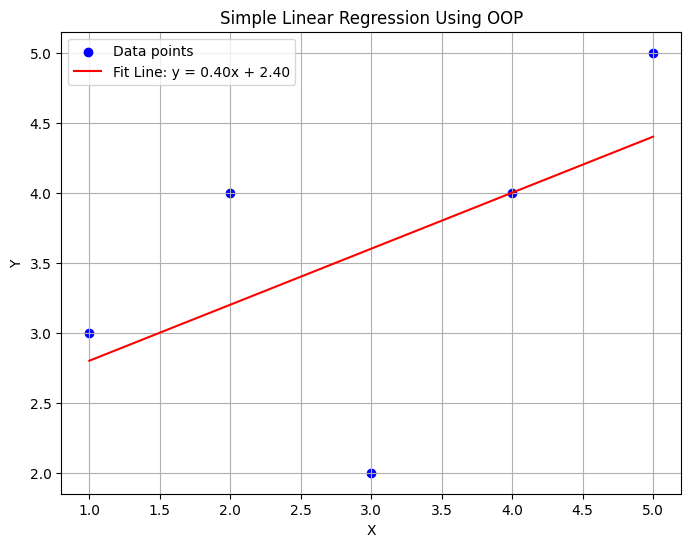

In [3]:
import matplotlib.pyplot as plt

class SimpleLinearRegression:
    def __init__(self):
        self.m = 0  # Slope
        self.b = 0  # Intercept

    def fit(self, x, y):
        n = len(x)
        mean_x = sum(x) / n
        mean_y = sum(y) / n
        SS_xy = sum(y[i] * x[i] for i in range(n)) - n * mean_x * mean_y
        SS_xx = sum(x[i] * x[i] for i in range(n)) - n * mean_x * mean_x
        self.m = SS_xy / SS_xx
        self.b = mean_y - self.m * mean_x

    def predict(self, x):
        return [self.m * x_i + self.b for x_i in x]
    
    def plot(self, x, y):
        predictions = self.predict(x)
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, color='blue', label='Data points')
        plt.plot(x, predictions, color='red', label=f'Fit Line: y = {self.m:.2f}x + {self.b:.2f}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Simple Linear Regression Using OOP')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example dataset
x = [1, 2, 3, 4, 5]
y = [3, 4, 2, 4, 5]

# Using the class
model = SimpleLinearRegression()
model.fit(x, y)
model.plot(x, y)

•	sklearn.datasets: Contains make_regression which is used to generate synthetic regression data.

•	sklearn.model_selection: Includes train_test_split to split data into training and testing sets.

•	make_regression generates a dataset for regression analysis. Here, 100 samples with 1 feature and added noise of 20 units are created. random_state ensures reproducibility.

•	The data is then split into training and testing sets, with 20% of the data reserved for testing. The random_state parameter ensures that the split is reproducible.

•	The LinearRegression class encapsulates the model. It initializes with a learning_rate and number of n_iterations for the gradient descent.

•	fit method calculates the optimal values for weights and bias using gradient descent. dw and db are the gradients of the loss function with respect to the weights and bias, respectively.

•	predict method computes the predicted values using the learned weights and bias.

•	An instance of LinearRegression is created and trained on the training data using the fit method.

•	Predictions are made on the test data.

•	The results are visualized by plotting the training data (blue), test data (red), and the regression line (black).

•	mse function computes the Mean Squared Error, a measure of the average of the squares of the errors.

•	r2_score function computes the R-squared, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

Used sklearn for a few supportive tasks that are separate from the core algorithm of the linear regression model itself. Here’s why sklearn is used in this context:

	1.	Dataset Generation: The sklearn.datasets.make_regression function is a convenient tool to quickly generate a synthetic regression dataset. This function allows you to specify the number of samples, features, noise level, and random state to create a dataset that is well-suited for testing regression algorithms.
	2.	Data Splitting: The train_test_split function from sklearn.model_selection is used to easily and efficiently split the dataset into training and testing sets. This function ensures that the data is shuffled and split according to the specified proportion, which is important for evaluating the performance of your model on unseen data.

By using these sklearn functions, you can focus on the core task of implementing and understanding the linear regression algorithm without getting bogged down by the details of dataset creation and management.